CAR PRICE PREDICTION WITH MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/car data.csv')


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Data Cleaning

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(299, 9)

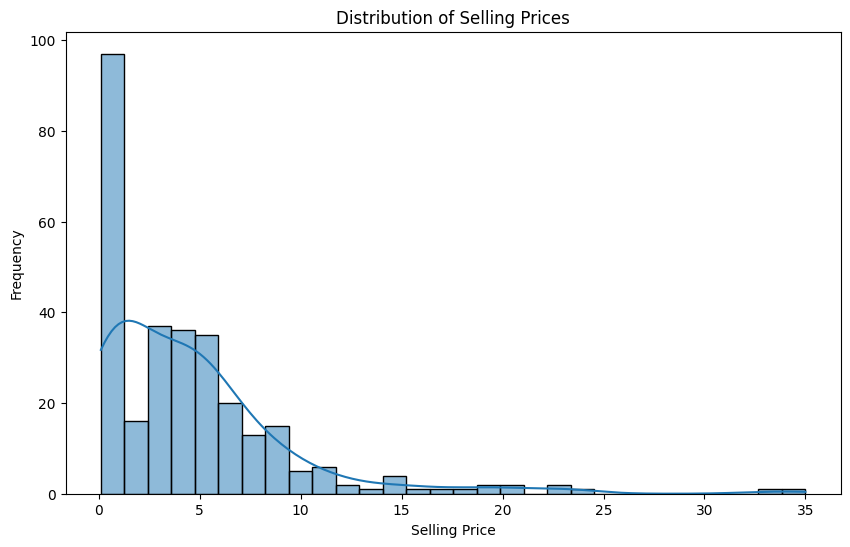

In [ ]:
# Distribution of the target variable (Selling_Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


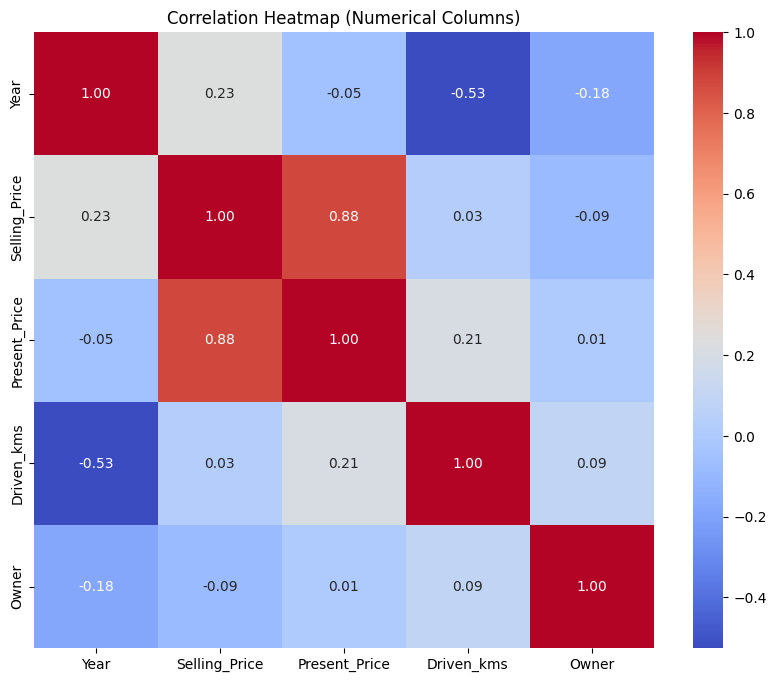

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()


<ipython-input-38-9bffc05adf37>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')


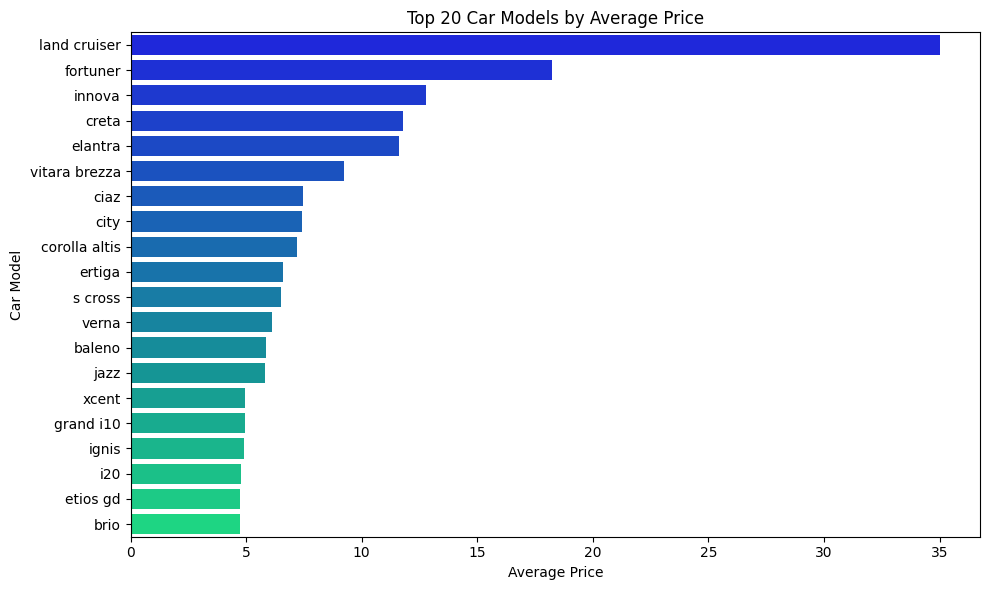

In [ ]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

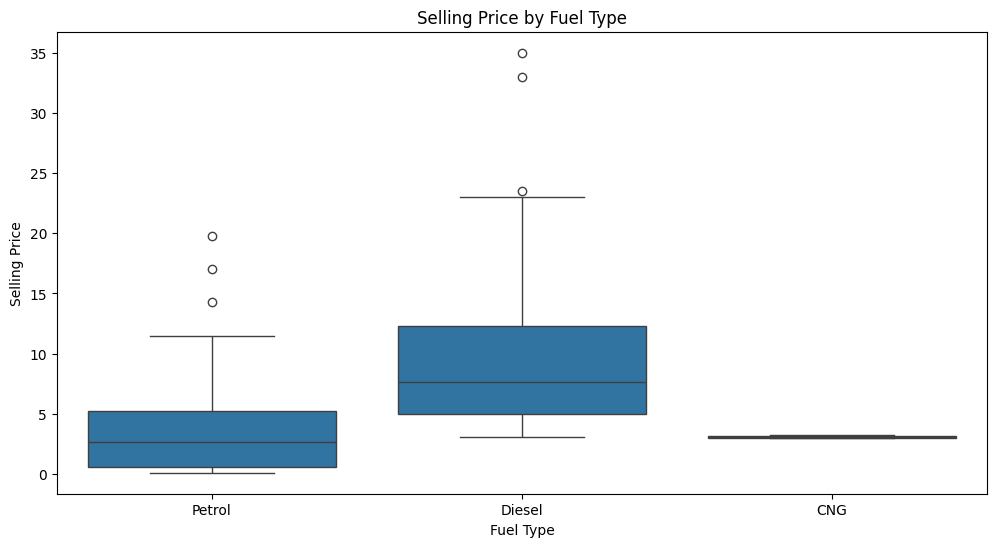

In [ ]:
# Selling Price by Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


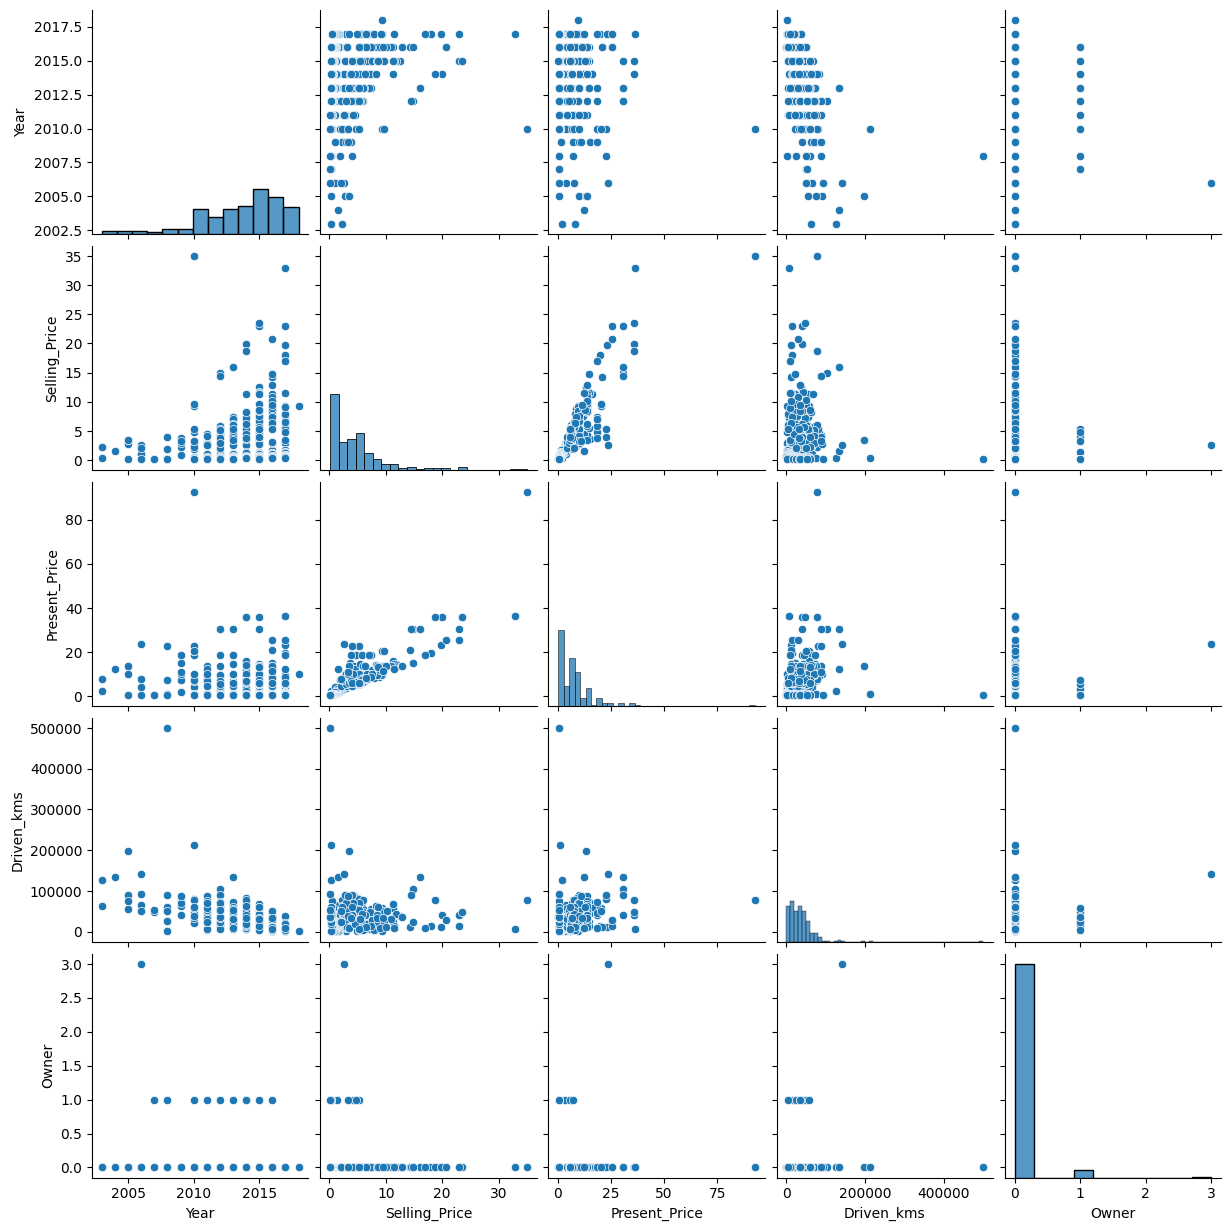

In [ ]:
sns.pairplot(df)
plt.show()


In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
# Define the feature matrix (X) and the target vector (y)
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)

# Make predictions
y_pred_lr = lr.predict(x_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')


Linear Regression Mean Squared Error: 6.675444100493416
Linear Regression R-squared: 0.7409934356413092


In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt.predict(x_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regressor Mean Squared Error: {mse_dt}')
print(f'Decision Tree Regressor R-squared: {r2_dt}')


Decision Tree Regressor Mean Squared Error: 4.485575
Decision Tree Regressor R-squared: 0.8259601380172803


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regressor Mean Squared Error: {mse_rf}')
print(f'Random Forest Regressor R-squared: {r2_rf}')

Random Forest Regressor Mean Squared Error: 11.812905827500007
Random Forest Regressor R-squared: 0.5416604337608965


In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost Regressor model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(x_train, y_train)
y_pred_xgbr = xgbr.predict(x_test)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print(f'XGBoost Regressor Mean Squared Error: {mse_xgbr}')
print(f'XGBoost Regressor R-squared: {r2_xgbr}')

XGBoost Regressor Mean Squared Error: 5.324070201404525
XGBoost Regressor R-squared: 0.7934266079513208


In [ ]:
# Select the best model based on R-squared
models = {
    'Linear Regression': r2_lr,
    'Decision Tree Regressor': r2_dt,
    'Random Forest Regressor': r2_rf,
    'XGBoost Regressor': r2_xgbr
}

best_model_name = max(models, key=models.get)
best_r2_score = models[best_model_name]

print(f'The best model is {best_model_name} with an R-squared value of {best_r2_score}')

The best model is Decision Tree Regressor with an R-squared value of 0.8259601380172803
